# Task 2 - To Explore Supervised Machine Learning 

# #Problem Statement : In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

### #Mandatory imports

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

## #Read the file from remote link

In [2]:
data =  "http://bit.ly/w-data"
student_score = pd.read_csv(data)
print("Data imported successfully")

Data imported successfully


In [3]:
student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# #Check null counts

In [4]:
student_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

# #Plotting the distribution of scores 

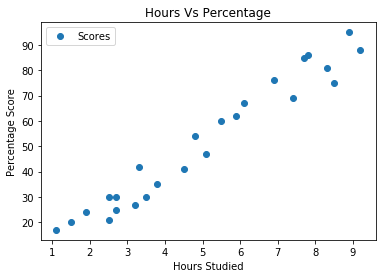

In [6]:
student_score.plot(x = "Hours" , y = "Scores" , style = "o")        #plotting the x and y variable
plt.title("Hours Vs Percentage")    #Title of the plot
plt.xlabel("Hours Studied")         #title of x-variable
plt.ylabel("Percentage Score")      #title of y-variable
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# #Diving input and output

In [27]:
X = student_score.iloc[ :, :-1].values
Y = student_score.iloc[ :, 1].values

# #Splitting into train and test

In [28]:
import sklearn 
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2 ,random_state = 0)

# #Training the algorithm:

# #Building the model on train data

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# #Plotting the regression line

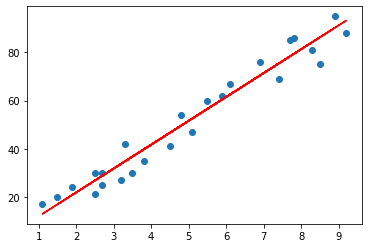

In [36]:
line = reg.coef_*X+reg.intercept_  #Formula for line : y = mx + c

#Plot for test data
plt.scatter(X, Y)
plt.plot(X, line , color= "r");
plt.show()

# #Prediction:

## #Prediction has to be done on test data

In [37]:
pred_value = reg.predict(X_test)
pred_value

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# #Create a dataframe with "Actual" and "Predicted" values

In [39]:
df = pd.DataFrame({ "Actual" : Y_test   ,
                    "Predicted" : pred_value})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
# We can also test with our own data
hours = np.array([9.25])

hours = hours.reshape(-1 , 1)

own_pred = reg.predict(hours)

print("No of Hours = {}".format(hours))

print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# #R-square

In [44]:
reg.score(X_train, Y_train)  

0.9515510725211553

# #Adjusted R-Square

In [45]:
X_train.shape

(20, 1)

In [46]:
k = 1
N = 20

Rsq= reg.score(X_train, Y_train)

AdR_Square= 1- (1-Rsq)*(N-1) / (N-k-1)

print("R Square value is ....",Rsq)
print("Adjusted R Square value is ....",AdR_Square)

R Square value is .... 0.9515510725211553
Adjusted R Square value is .... 0.9488594654389974


# #Model Evaluation------------------------------------------------------------------------------

In [42]:
from sklearn import metrics  

In [43]:
print('Mean Absolute Error:',  metrics.mean_absolute_error(Y_test, pred_value))

print('Mean Squared Error:',  metrics.mean_squared_error(Y_test, pred_value)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test , pred_value))) 

Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368
